## Modules Import

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

## `Read The IBM Cloud Data `

In [ ]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2022-02-20 18:52:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.03s   

2022-02-20 18:52:45 (1.09 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



**## Read the data from csv**


In [ ]:
data = pd.read_csv('teleCust1000t.csv')

##Read the first 5 rows in data  

In [ ]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


##Information on Data 

In [14]:
print(f"The Data contains {data.shape[0]} Rows")
print(f"The Data contains {data.shape[1]} Coloums")
print(f"The Data contains {data.shape[1]-1} Featuers")
print(f"The Data contains {set(data['custcat'])} labels and they are {len(set(data['custcat']))} label")
print(f"The Data featuers are {list(data.columns)}")

The Data contains 1000 Rows
The Data contains 12 Coloums
The Data contains 11 Featuers
The Data contains {1, 2, 3, 4} labels and they are 4 label
The Data featuers are ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']


##Read the data in term of x and y 

In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

##The X and Y Shapes

In [16]:
print(f"X Shape is {x.shape}")
print(f"Y shape is {y.shape}")

X Shape is (1000, 11)
Y shape is (1000,)


##Normalize the Data using preprocessing

In [18]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(f"The X after normalizaion \n {x}")

The X after normalizaion 
 [[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


##Divid The Data two Parts Test and Train

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


##Train the Module using K=4

In [22]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

##The module Prediction 

In [25]:
yhat = neigh.predict(X_test)
print(f"The y predicted is: \n{yhat}")

The y predicted is: 
[1 1 3 2 4 3 3 2 2 4 1 4 2 1 3 1 3 4 3 4 3 3 3 1 1 3 1 1 1 2 1 1 4 4 3 2 3
 1 2 3 1 4 2 1 2 1 4 1 4 4 2 1 2 3 2 3 3 3 4 1 1 4 2 3 3 1 1 2 2 1 1 3 4 3
 2 1 4 2 2 3 3 1 2 4 4 2 3 4 1 1 2 2 1 1 1 1 2 2 3 1 1 4 1 1 1 4 2 2 2 2 1
 3 2 4 1 2 1 1 2 3 4 2 2 3 1 1 2 3 1 3 3 1 1 4 2 2 2 1 1 3 1 1 4 1 1 2 1 3
 2 2 1 2 2 3 2 3 3 3 3 2 3 1 1 1 3 4 1 1 3 1 3 3 1 2 2 2 1 1 1 1 1 1 1 2 3
 1 1 1 4 4 3 1 1 3 3 4 1 4 3 3]


##Get the module accuracy while testing and training using k=4

In [27]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


##LOOPIN TO GET THE HIGHER ACCURACY AT WHICH K?

In [36]:
Ks = 10 ##try k form 1 to 10
mean_acc = np.zeros((Ks-1)) ## an array to hold the accuracy results
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) ##fit at every the k from 1 to 10
    yhat=neigh.predict(X_test) ##perdict the y 
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)##get the difference between the y perdicted and y test

result=[f"The Accuracy is={i} at k is={j+1}" for j,i in enumerate(list(mean_acc))]
for i in result: print(i,"\n")

The Accuracy is=0.3 at k is=1 

The Accuracy is=0.29 at k is=2 

The Accuracy is=0.315 at k is=3 

The Accuracy is=0.32 at k is=4 

The Accuracy is=0.315 at k is=5 

The Accuracy is=0.31 at k is=6 

The Accuracy is=0.335 at k is=7 

The Accuracy is=0.325 at k is=8 

The Accuracy is=0.34 at k is=9 



##visual the result using matplot
 

Text(0.5, 0, 'Number of Neighbors (K)')

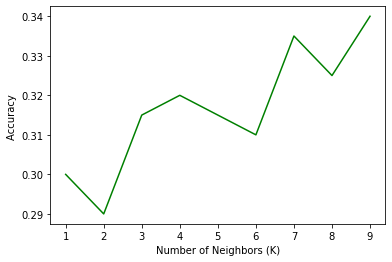

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

# So we the highest accuracy is at k=9 equal to 0.34 